In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt 

In [2]:
loan_data = pd.read_csv("Raw Data/Task 3 and 4_Loan_Data.csv")

In [3]:
fico_score = loan_data[['fico_score']]

# Data Exploration

In [4]:
fico_score.describe()

,fico_score
count,10000.000000
mean,637.557700
std,60.657906
min,408.000000
25%,597.000000
50%,638.000000
75%,679.000000
max,850.000000


In [5]:
# Checking missing data
fico_score.isna().sum()

fico_score    0
dtype: int64

(array([  12.,  117.,  439., 1323., 2458., 2878., 1856.,  732.,  161.,
          24.]),
 array([408. , 452.2, 496.4, 540.6, 584.8, 629. , 673.2, 717.4, 761.6,
        805.8, 850. ]),
 <BarContainer object of 10 artists>)

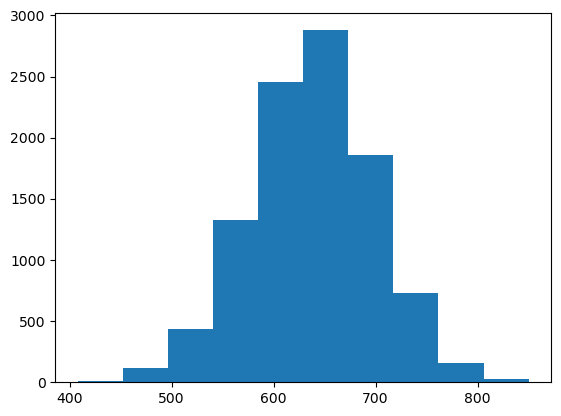

In [6]:
plt.hist(fico_score)

# Model Building

## Model 1: KMeans

In [7]:
k_values = int(input("Desired number of buckets: "))

fico_score = loan_data[['fico_score']]

kmeans = KMeans(n_clusters=k_values, n_init=10, random_state=42)
kmeans.fit(fico_score)
fico_score['bucket'] = kmeans.labels_

centers = kmeans.cluster_centers_
sorted_centers = np.sort(centers, axis=0)

boundaries = []
boundaries = [(sorted_centers[i] + sorted_centers[i+1])/2 for i in range(len(sorted_centers)-1)]
boundaries = np.insert(boundaries,0,(fico_score['fico_score']).min())
boundaries = np.append(boundaries,(fico_score['fico_score']).max())
print(f'Boundaries are {boundaries}')

Desired number of buckets: 3
Boundaries are [408.         600.47388747 675.08082824 850.        ]


/var/folders/t4/0mn6xgl15ss4cx1r1nz8n8980000gn/T/ipykernel_6079/3042426793.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fico_score['bucket'] = kmeans.labels_


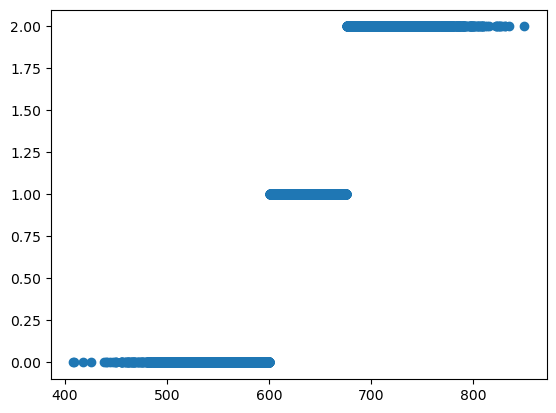

In [8]:
### Plot the classification result
plt.plot(fico_score['fico_score'],fico_score['bucket'],'o')

/var/folders/t4/0mn6xgl15ss4cx1r1nz8n8980000gn/T/ipykernel_6079/3618485723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fico_score['default'] = loan_data['default']


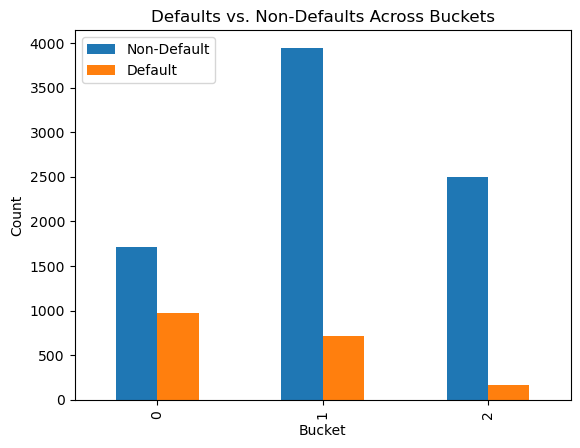

In [9]:
fico_score['default'] = loan_data['default']
bucket_default_counts = fico_score.groupby(['bucket','default']).size().unstack(fill_value=0)

# Bar plot the default count across buckets
bucket_default_counts.plot(kind='bar')

plt.ylabel('Count')
plt.xlabel('Bucket')
plt.title('Defaults vs. Non-Defaults Across Buckets')
plt.legend(['Non-Default', 'Default'], loc='upper left')
plt.show()

### Model Evaluation

In [10]:
silh_score = silhouette_score(fico_score[['fico_score']],kmeans.labels_)
db_score = davies_bouldin_score(fico_score[['fico_score']],kmeans.labels_)
print(f'Silhouette Score: {silh_score}; Davies Bouldin Score: {db_score}')

Silhouette Score: 0.5306006312367325; Davies Bouldin Score: 0.5646471365486302


### Extra: Find Optimal Number of Buckets for KMeans Model

In [11]:
# Optimal k_value
fico_score = loan_data[['fico_score']]

k_values = range(3,20)
silh_score = []
db_score = []
elb_score = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(fico_score)
    # calculate the silhouette score for each k
    silh_score.append(silhouette_score(fico_score, kmeans.labels_))
    # calculate the davies bouldin score for each k
    db_score.append(davies_bouldin_score(fico_score, kmeans.labels_))
    # calculate the inertia for elbow method
    elb_score.append(kmeans.inertia_)

Text(0.5, 0, 'K Value')

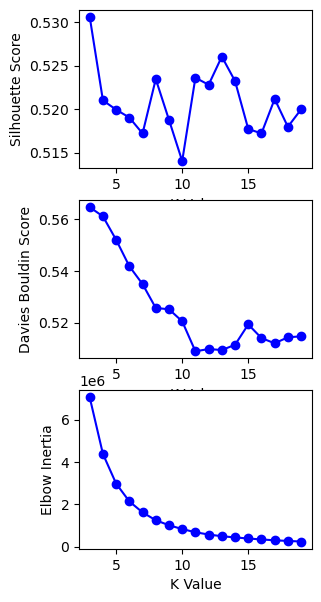

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(3,7))

axes[0].plot(k_values, silh_score, 'bo-')
axes[0].set_ylabel('Silhouette Score')
axes[0].set_xlabel('K Value')

axes[1].plot(k_values, db_score, 'bo-')
axes[1].set_ylabel('Davies Bouldin Score')
axes[1].set_xlabel('K Value')

axes[2].plot(k_values, elb_score, 'bo-')
axes[2].set_ylabel('Elbow Inertia')
axes[2].set_xlabel('K Value')

Comment: It appears that K=3 is the best based on Silhouette Score and Elbow Inertia

/var/folders/t4/0mn6xgl15ss4cx1r1nz8n8980000gn/T/ipykernel_6079/2860853881.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fico_score['bucket'] = kmeans.labels_
/var/folders/t4/0mn6xgl15ss4cx1r1nz8n8980000gn/T/ipykernel_6079/2860853881.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fico_score['default'] = loan_data['default']


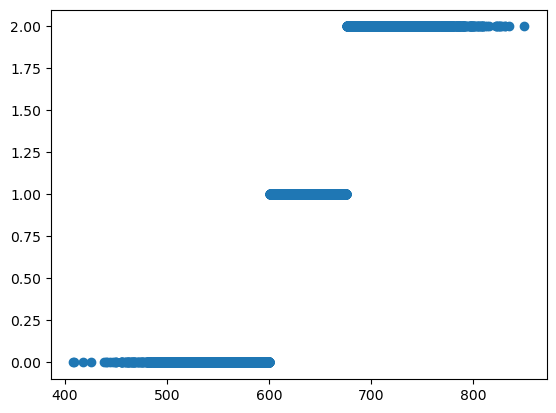

In [13]:
# based on the optimal number of buckets, add the bucket to the fico_score dataframe
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(fico_score)
fico_score['bucket'] = kmeans.labels_
fico_score['default'] = loan_data['default']

plt.plot(fico_score['fico_score'],fico_score['bucket'],'o')

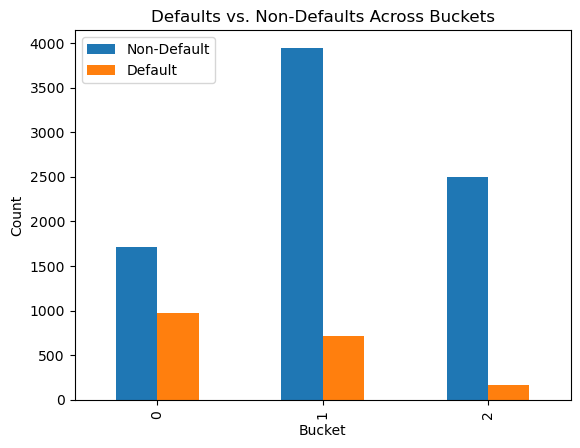

In [14]:

bucket_default_counts = fico_score.groupby(['bucket','default']).size().unstack(fill_value=0)

# Plot the bar plot
bucket_default_counts.plot(kind='bar')

plt.ylabel('Count')
plt.xlabel('Bucket')
plt.title('Defaults vs. Non-Defaults Across Buckets')
plt.legend(['Non-Default', 'Default'], loc='upper left')
plt.show()

## Model 2: MSE Minimization

In [15]:
from scipy.optimize import minimize

In [16]:
fico_score = loan_data['fico_score']

In [17]:
def calculate_mse(fico_score, boundaries):
    mse = 0
    for i in range(len(boundaries)-1):
        bucket_scores = fico_score[(fico_score > boundaries[i]) & (fico_score < boundaries[i+1])]
        if len(bucket_scores) > 0: 
            bucket_mean = np.mean(bucket_scores, axis=0)
            mse += np.sum((bucket_scores - bucket_mean)**2)
    return mse/len(fico_score)   

In [18]:
def optimize_func(boundaries):
    complete_boundaries = np.insert(boundaries, 0, fico_score.min())
    complete_boundaries = np.append(complete_boundaries, fico_score.max())
    return calculate_mse(fico_score, complete_boundaries)

In [19]:
def find_boundaries():
    k_values = int(input('Desired number of buckets: '))
    initial_guess = (np.linspace(fico_score.min(), fico_score.max(), k_values+1)[1:-1])
    
    result = minimize(optimize_func, initial_guess, method='Powell')
    optimized_boundaries = np.insert(result.x, 0, fico_score.min())
    optimized_boundaries = np.append(optimized_boundaries, fico_score.max())
    return optimized_boundaries

In [20]:
optimized_result = find_boundaries()
print(optimized_result)

Desired number of buckets: 3
[408.         599.92208005 673.15544211 850.        ]
